In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
df = pd.read_csv(r"C:\Users\jaija.JAILAYA\Desktop\datasets\deliveries.csv")

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [59]:
print(df.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [60]:
df.fillna({
    "player_dismissed": "Not Out",
    "dismissal_kind": "Not Dismissed",
    "extras_type": "No Extras"
}, inplace=True)

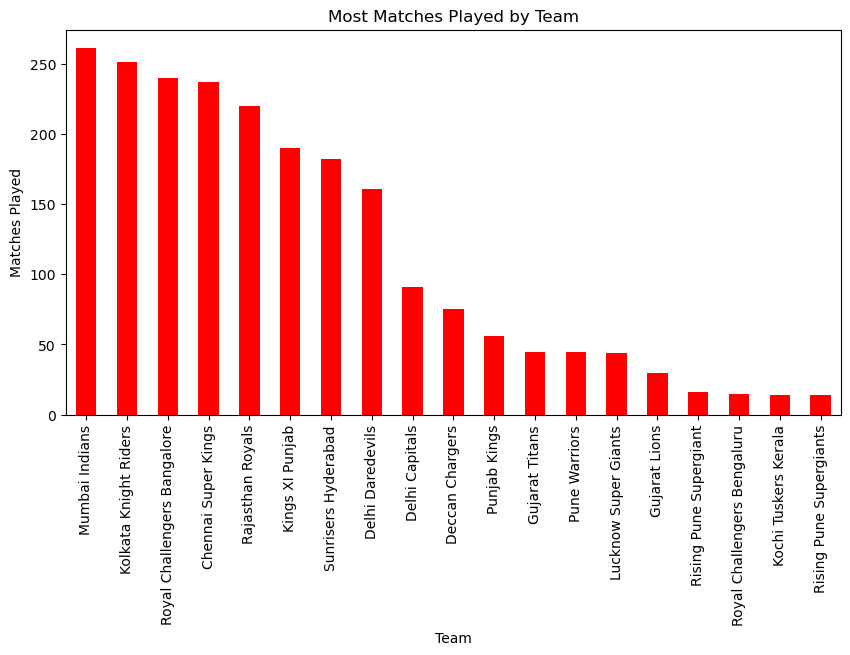

In [61]:
# Most Matches Played by Team 
most_matches_team = df.groupby('batting_team')['match_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
most_matches_team.plot(kind='bar', color='red')
plt.title("Most Matches Played by Team")
plt.xlabel("Team")
plt.ylabel("Matches Played")
plt.xticks(rotation=90)
plt.show()


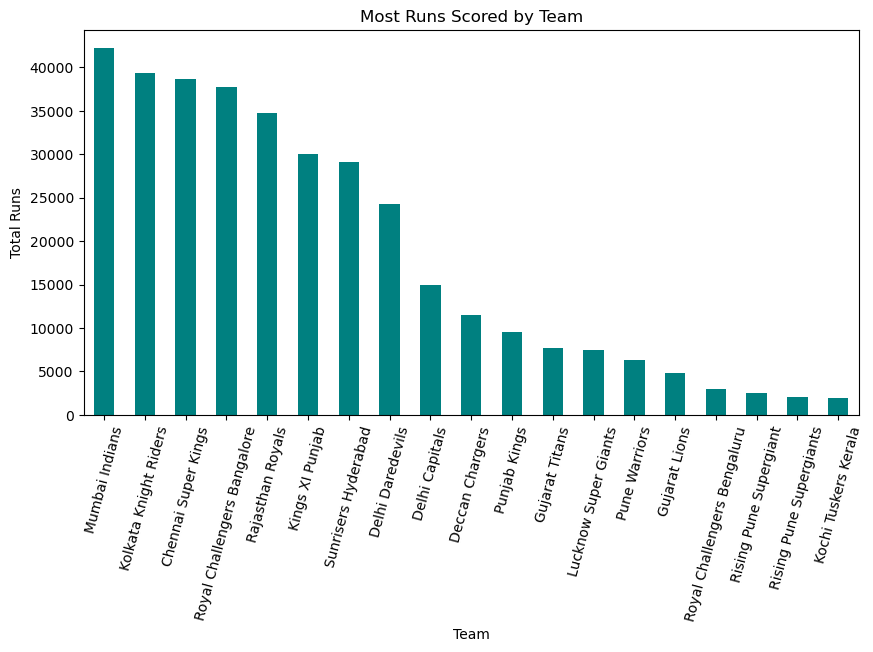

In [62]:
# Most Runs Scored team 
most_runs_team = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
most_runs_team.plot(kind='bar', color='teal')
plt.title("Most Runs Scored by Team")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=75)
plt.show()

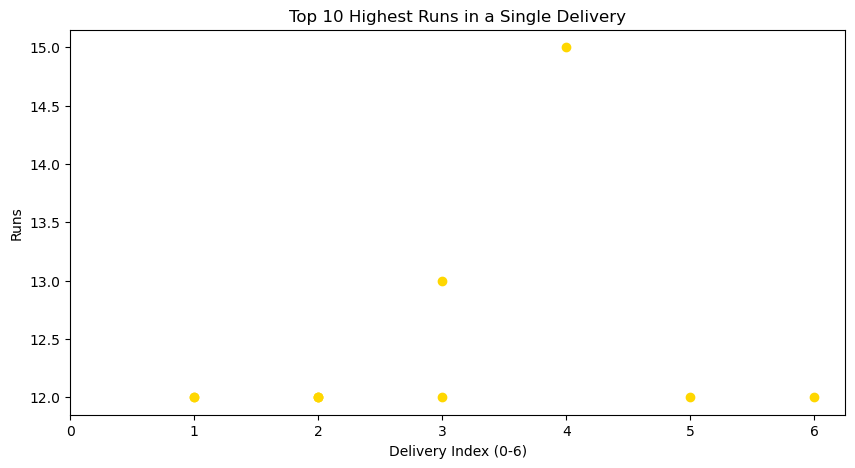

In [63]:
# Highest Runs in a Single Delivery
highest_runs = df.groupby(['match_id', 'over', 'ball'])['batsman_runs'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 5))
plt.scatter(highest_runs['ball'], highest_runs['batsman_runs'], color='gold')
plt.title("Top 10 Highest Runs in a Single Delivery")
plt.xlabel("Delivery Index (0-6)")
plt.ylabel("Runs")
plt.xticks(range(0, 7))
plt.show()

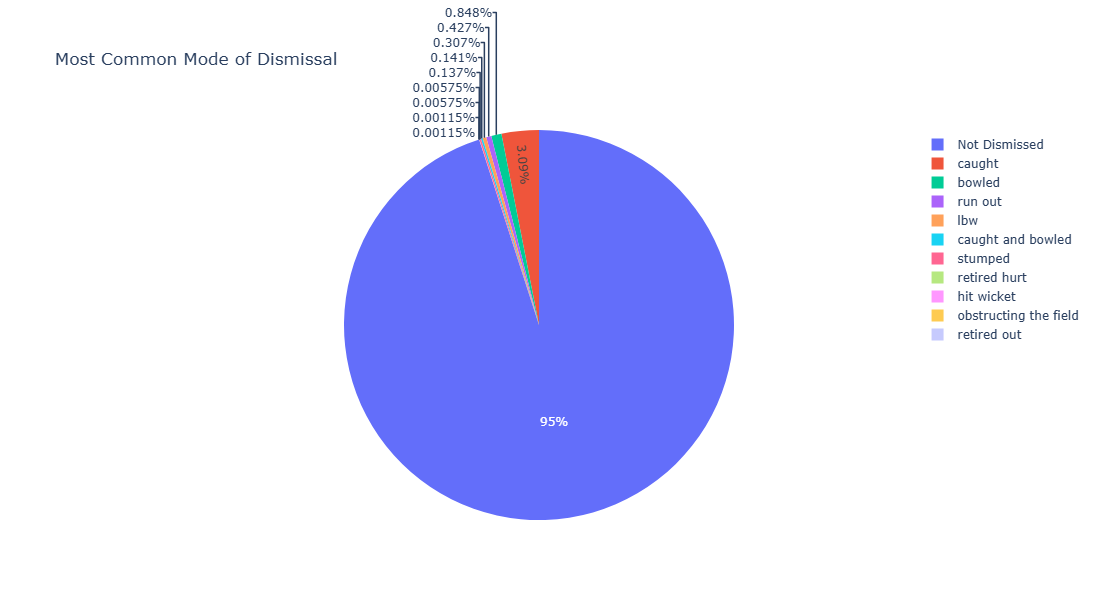

In [64]:
# Most Common Mode of Dismissal 
most_common_dismissal = df['dismissal_kind'].value_counts()
fig = px.pie(most_common_dismissal, values=most_common_dismissal.values, names=most_common_dismissal.index, title="Most Common Mode of Dismissal", width=800, height=600)
fig.show()

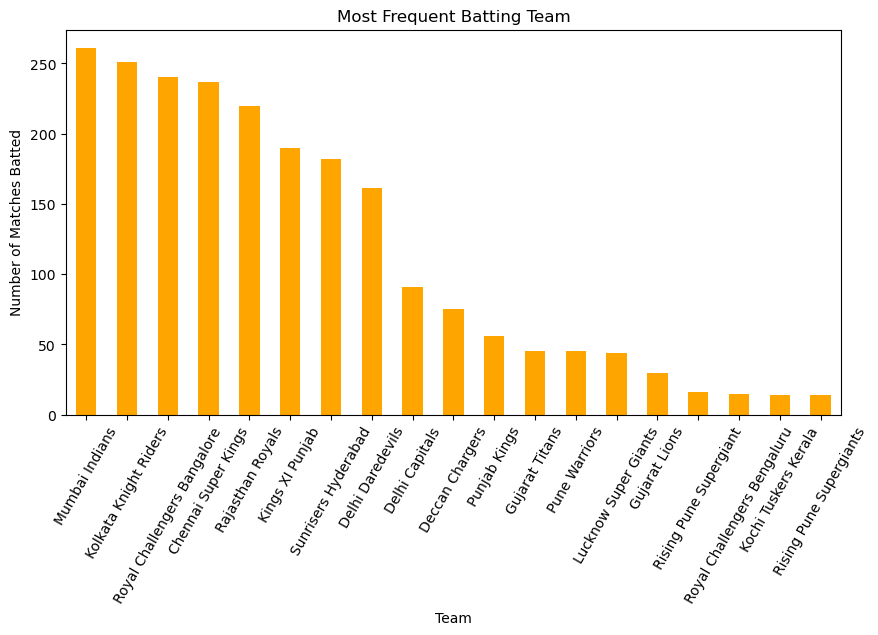

In [65]:
# Most Frequent Batting Team 
most_frequent_batting_team = df.groupby('batting_team')['match_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
most_frequent_batting_team.plot(kind='bar', color='orange')
plt.title("Most Frequent Batting Team")
plt.xlabel("Team")
plt.ylabel("Number of Matches Batted")
plt.xticks(rotation=60)
plt.show()


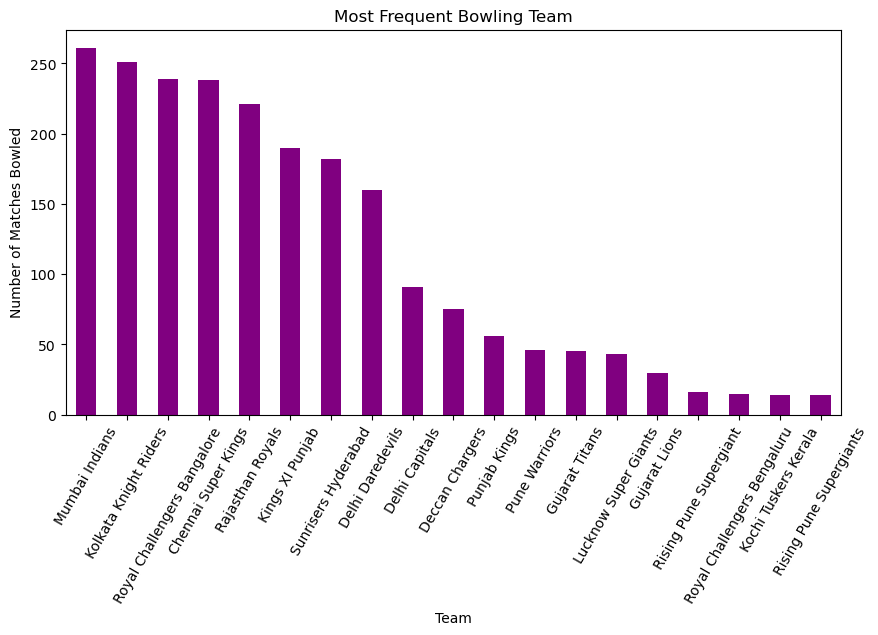

In [66]:
# Most Frequent Bowling Team (Corrected)
most_frequent_bowling_team = df.groupby('bowling_team')['match_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
most_frequent_bowling_team.plot(kind='bar', color='purple')
plt.title("Most Frequent Bowling Team")
plt.xlabel("Team")
plt.ylabel("Number of Matches Bowled")
plt.xticks(rotation=60)
plt.show()


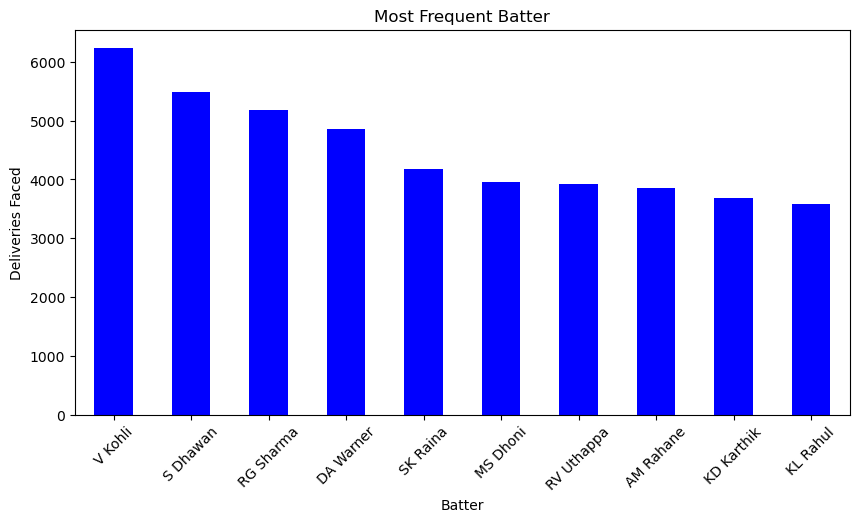

In [67]:
# Most Frequent Batter
most_frequent_batter = df['batter'].value_counts()
plt.figure(figsize=(10, 5))
most_frequent_batter[:10].plot(kind='bar', color='blue')
plt.title("Most Frequent Batter")
plt.xlabel("Batter")
plt.ylabel("Deliveries Faced")
plt.xticks(rotation=45)
plt.show()

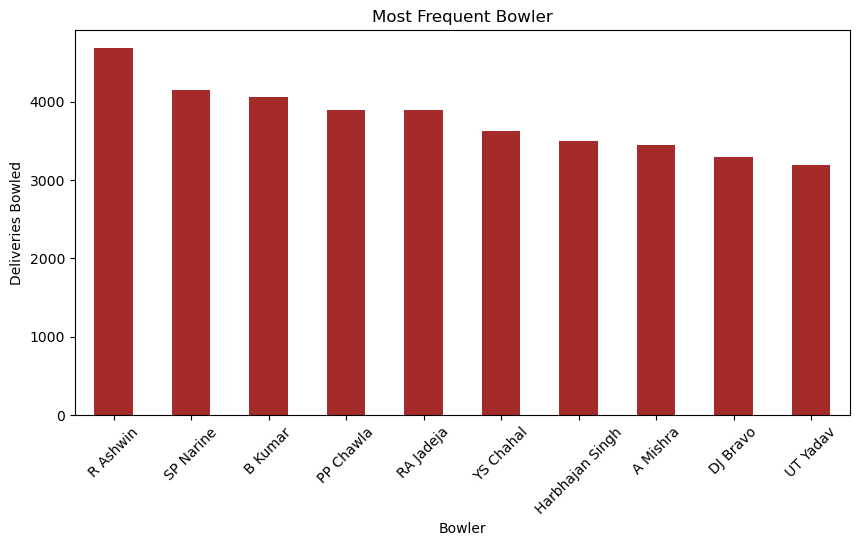

In [68]:
# Most Frequent Bowler
most_frequent_bowler = df['bowler'].value_counts()
plt.figure(figsize=(10, 5))
most_frequent_bowler[:10].plot(kind='bar', color='brown')
plt.title("Most Frequent Bowler")
plt.xlabel("Bowler")
plt.ylabel("Deliveries Bowled")
plt.xticks(rotation=45)
plt.show()

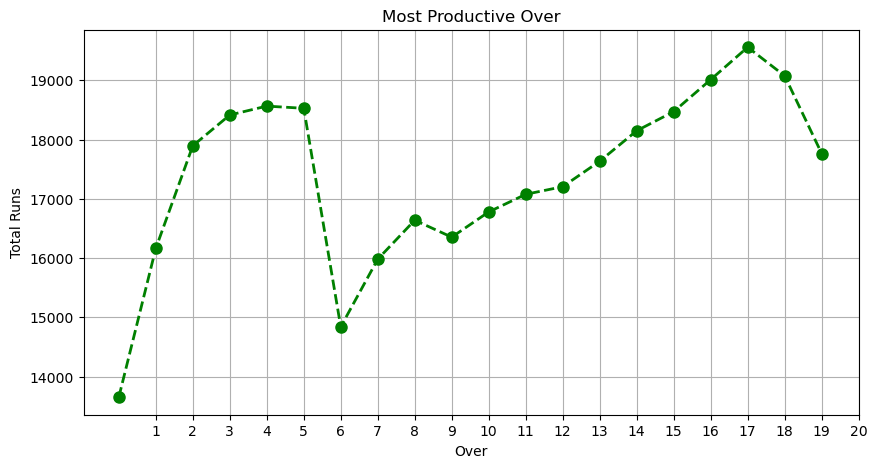

In [69]:
# Most Productive Over in Terms of Runs
most_productive_over = df.groupby('over')['total_runs'].sum()
plt.figure(figsize=(10, 5))
most_productive_over.plot(kind='line', color='green', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.title("Most Productive Over")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

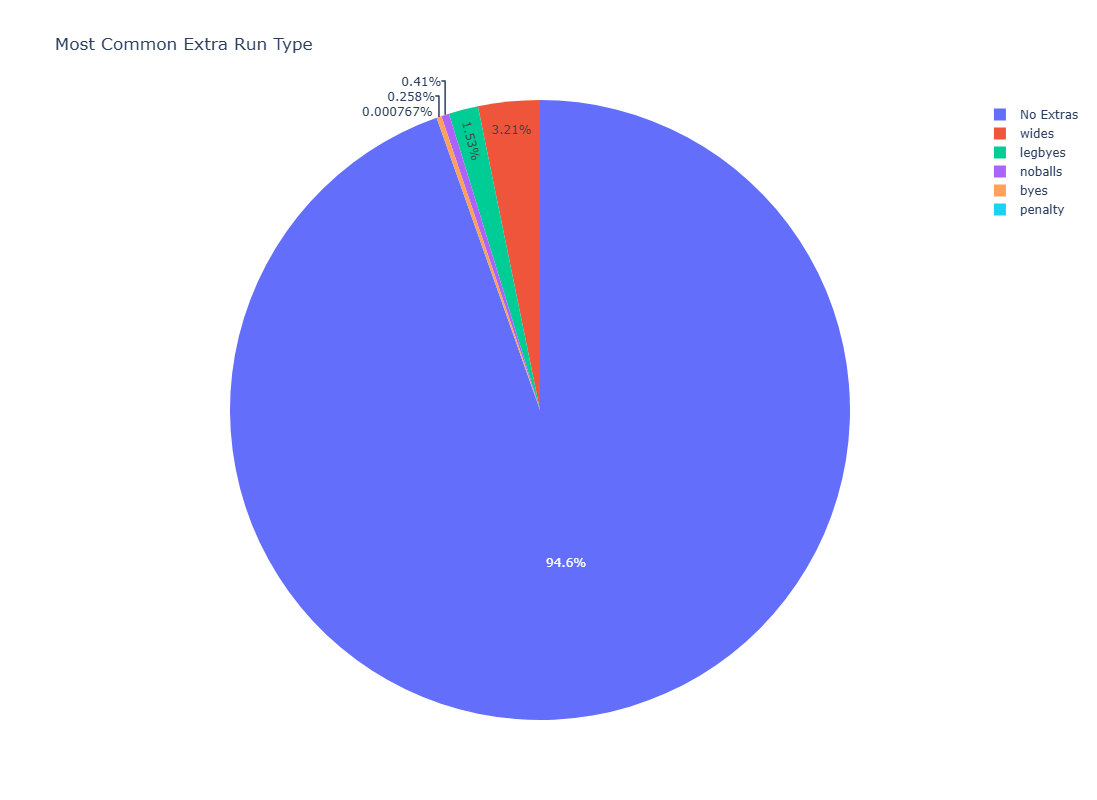

In [70]:
# Most Common Extra Run Type (Using Plotly Pie Chart)
most_common_extra_type = df['extras_type'].value_counts()
fig = px.pie(most_common_extra_type, values=most_common_extra_type.values, names=most_common_extra_type.index, title="Most Common Extra Run Type", width=1000, height=800)
fig.show()

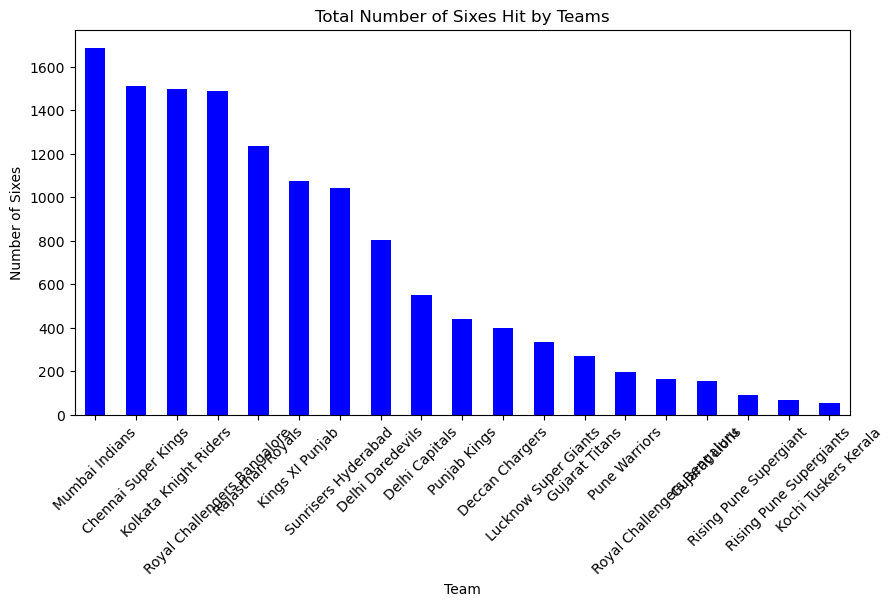

In [71]:
# Total Number of Sixes Hit by Teams
sixes_by_team = df[df['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sixes_by_team.plot(kind='bar', color='blue')
plt.title("Total Number of Sixes Hit by Teams")
plt.xlabel("Team")
plt.ylabel("Number of Sixes")
plt.xticks(rotation=45)
plt.show()

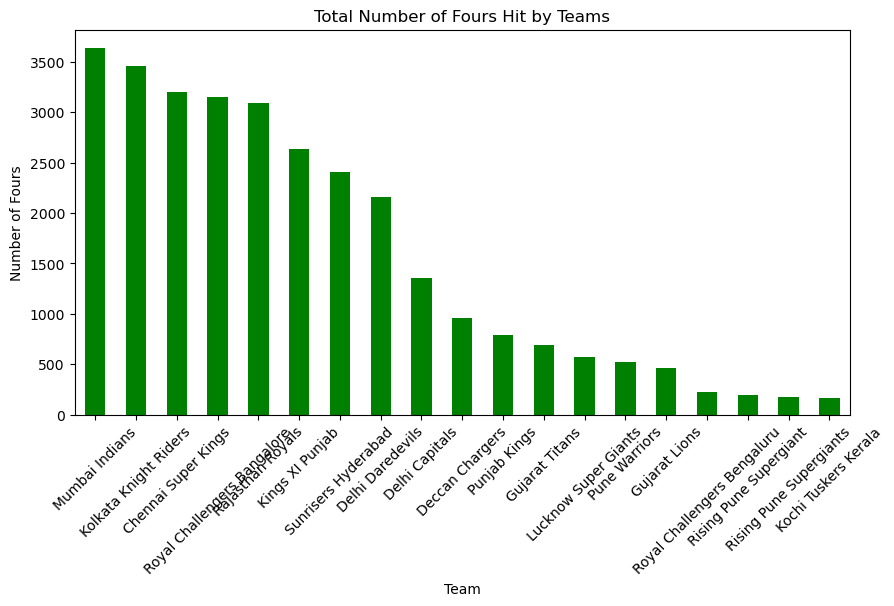

In [72]:
# Total Number of Fours Hit by Teams
fours_by_team = df[df['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
fours_by_team.plot(kind='bar', color='green')
plt.title("Total Number of Fours Hit by Teams")
plt.xlabel("Team")
plt.ylabel("Number of Fours")
plt.xticks(rotation=45)
plt.show()

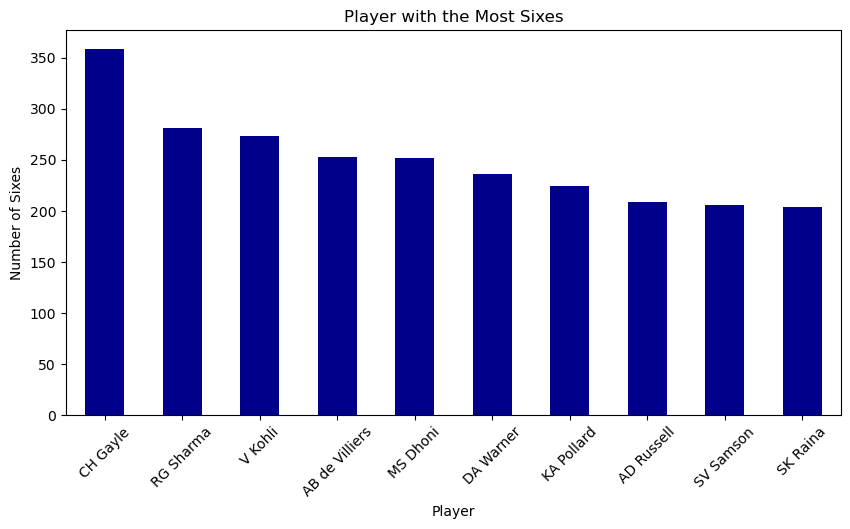

In [73]:
# Player with the Most Sixes
player_sixes = df[df['batsman_runs'] == 6]['batter'].value_counts()
plt.figure(figsize=(10, 5))
player_sixes[:10].plot(kind='bar', color='darkblue')
plt.title("Player with the Most Sixes")
plt.xlabel("Player")
plt.ylabel("Number of Sixes")
plt.xticks(rotation=45)
plt.show()

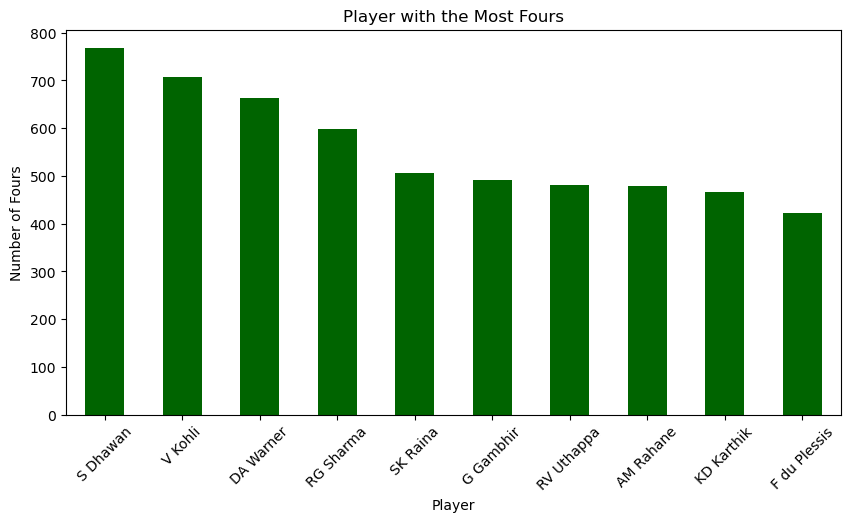

In [74]:
# Player with the Most Fours
player_fours = df[df['batsman_runs'] == 4]['batter'].value_counts()
plt.figure(figsize=(10, 5))
player_fours[:10].plot(kind='bar', color='darkgreen')
plt.title("Player with the Most Fours")
plt.xlabel("Player")
plt.ylabel("Number of Fours")
plt.xticks(rotation=45)
plt.show()

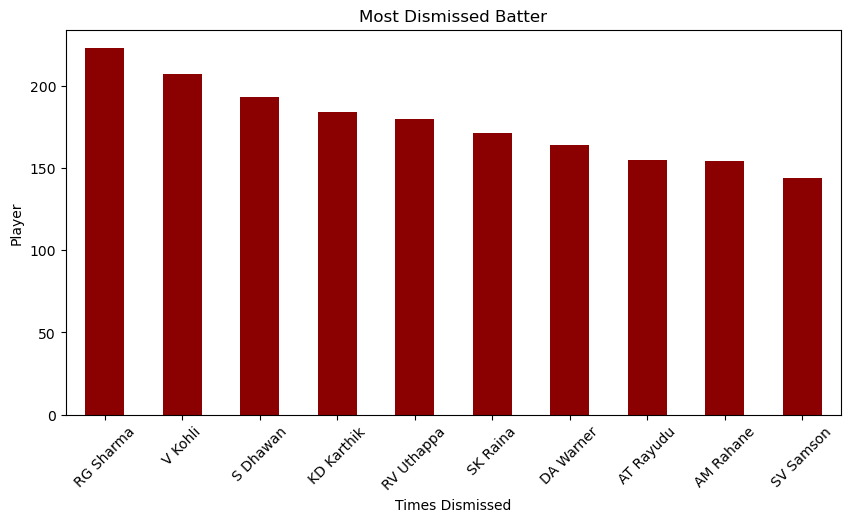

In [75]:
# Most Dismissed Batter
most_dismissed_batter = df[df['player_dismissed'] != "Not Out"]['player_dismissed'].value_counts()
plt.figure(figsize=(10, 5))
most_dismissed_batter[:10].plot(kind='bar', color='darkred')
plt.title("Most Dismissed Batter")
plt.xlabel("Times Dismissed")
plt.ylabel("Player")
plt.xticks(rotation=45)
plt.show()